In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a set of column names for the LIAR dataset
# These names correspond to the columns in the dataset files
column_names = [
    "id",               
    "label",             
    "statement",        
    "subject",           
    "speaker",         
    "speaker_job",    
    "state_info",    
    "party_affiliation",
    "barely_true_counts",
    "false_counts",
    "half_true_counts",
    "mostly_true_counts",
    "pants_fire_counts",
    "context"       
]

# Load the LIAR dataset from TSV files into pandas DataFrames
traindf = pd.read_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/LIAR/train.tsv', sep='\t', names=column_names, header=None)
validdf = pd.read_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/LIAR/valid.tsv', sep='\t', names=column_names, header=None)
testdf = pd.read_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/LIAR/test.tsv', sep='\t', names=column_names, header=None)

# Create dataset labels for train, validation, and test sets
# This helps in identifying which dataset a row belongs to when concatenated
traindf['dataset'] = 0
validdf['dataset'] = 1
testdf['dataset'] = 2

# Concatenate the train, validation, and test DataFrames into a single DataFrame
df = pd.concat([traindf, testdf, validdf], ignore_index=True)
df = df[['id', 'statement', 'label', 'subject']]
df.head()


,id,statement,label,subject
0,2635.json,Says the Annies List political group supports ...,false,abortion
1,10540.json,When did the decline of coal start? It started...,half-true,"energy,history,job-accomplishments"
2,324.json,"Hillary Clinton agrees with John McCain ""by vo...",mostly-true,foreign-policy
3,1123.json,Health care reform legislation is likely to ma...,false,health-care
4,9028.json,The economic turnaround started at the end of ...,half-true,"economy,jobs"


In [18]:
# Create a binary label for the dataset
true_labels = ['true', 'mostly-true', 'half-true']

df['label_binary'] = df['label'].apply(lambda x: 1 if x in true_labels else 0)

In [19]:
# Check for missing values in the DataFrame
df.isnull().sum()

id              0
statement       0
label           0
subject         2
label_binary    0
dtype: int64

In [20]:
# Check for duplicate rows in the DataFrame
df.duplicated().sum()

0

In [21]:
# Check the distribution of the binary labels
df.value_counts('label_binary')

label_binary
1    7134
0    5657
Name: count, dtype: int64

In [22]:
# Download and set up NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text data
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  #removes punctuation
    text = re.sub(r'\d+', '', text)  #removes numbers
    text = text.lower()  #turns everything to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words]) #gets rid of stop words
    return text

df['statement'] = df['statement'].fillna('').apply(clean_text)

# Save the cleaned DataFrame to a CSV file
df.to_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/LIAR/FullyCleanedLIAR.csv', index=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/euansmith9/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


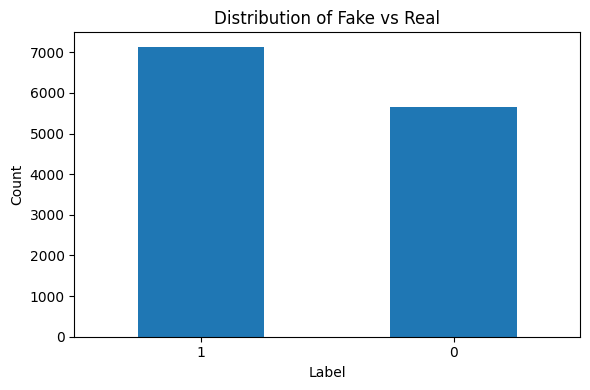

In [23]:
label_counts = df['label_binary'].value_counts()

# Plot label counts as bar chart
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Fake vs Real')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

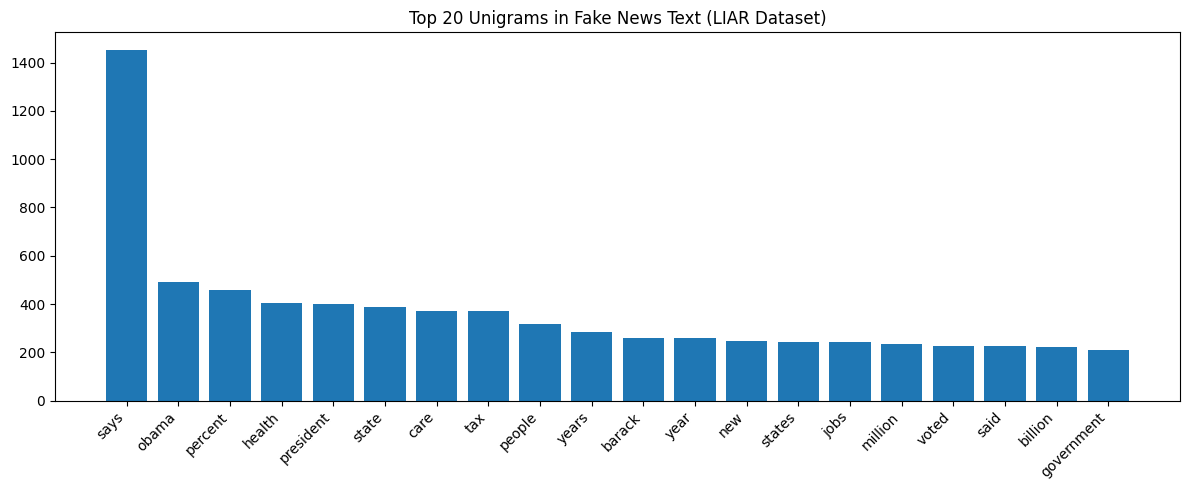

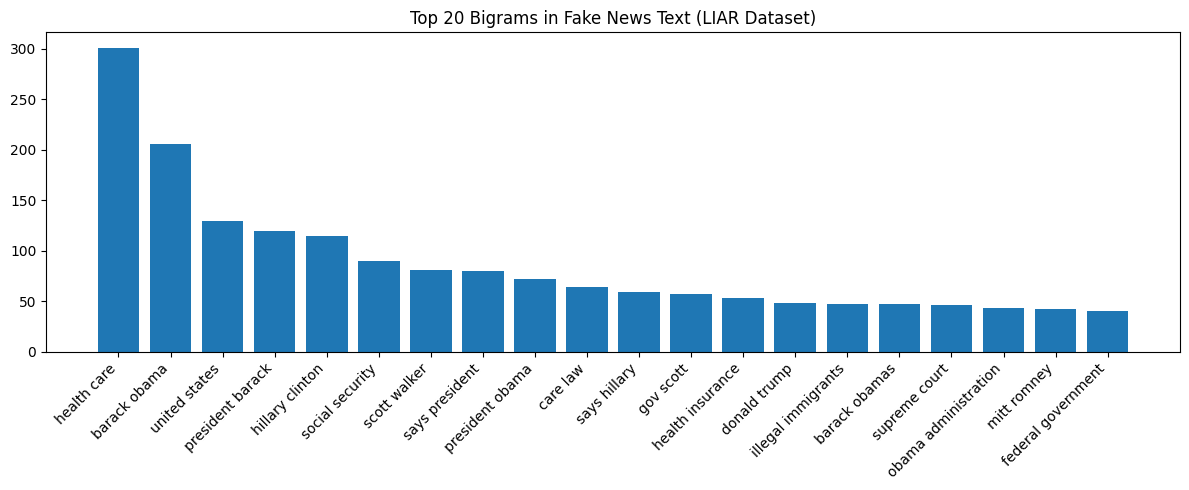

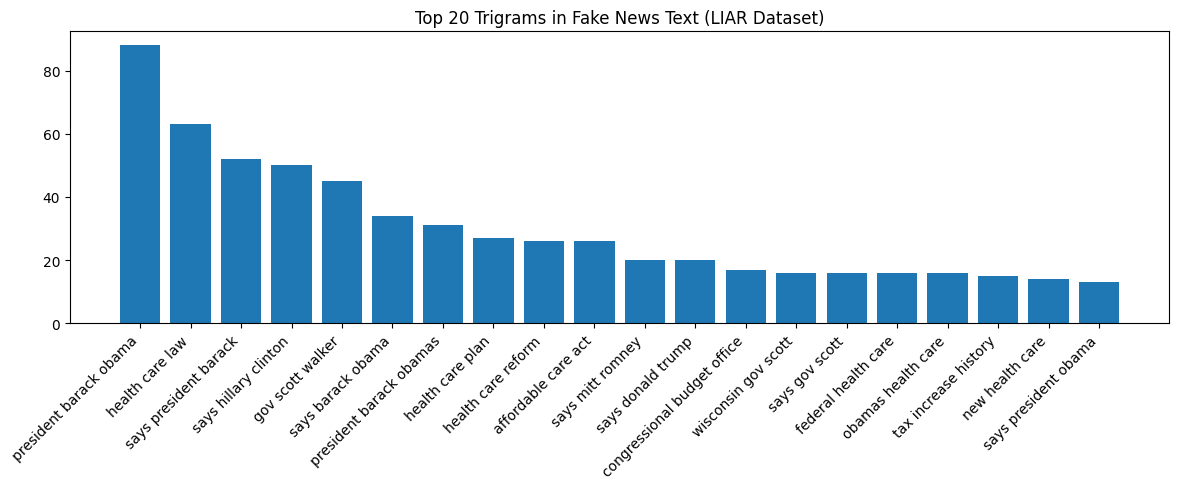

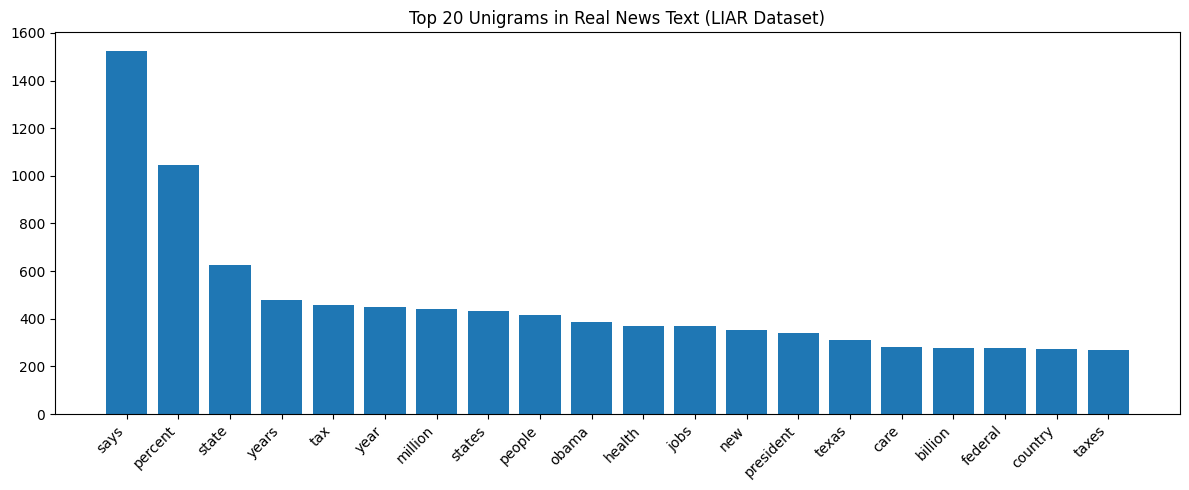

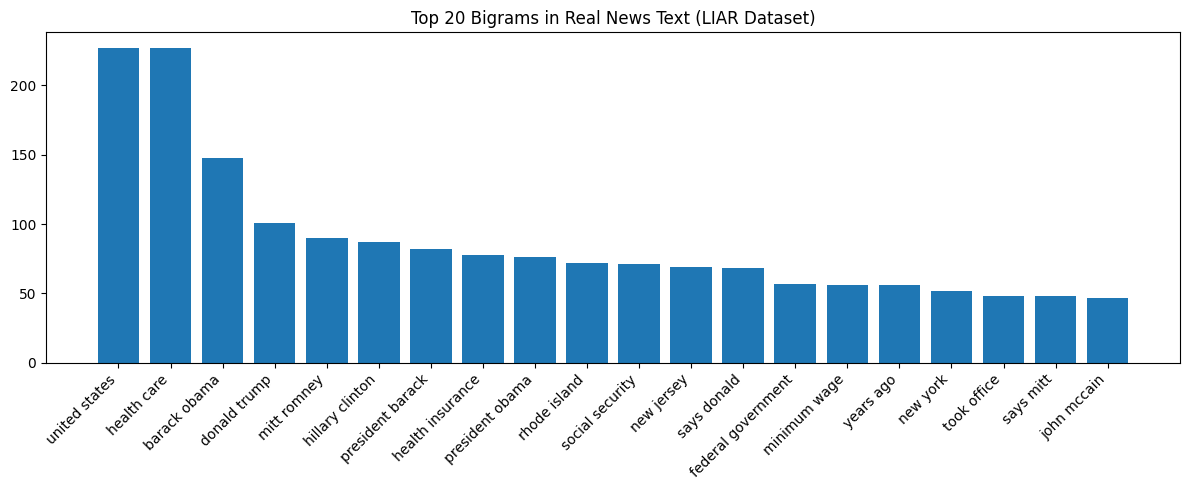

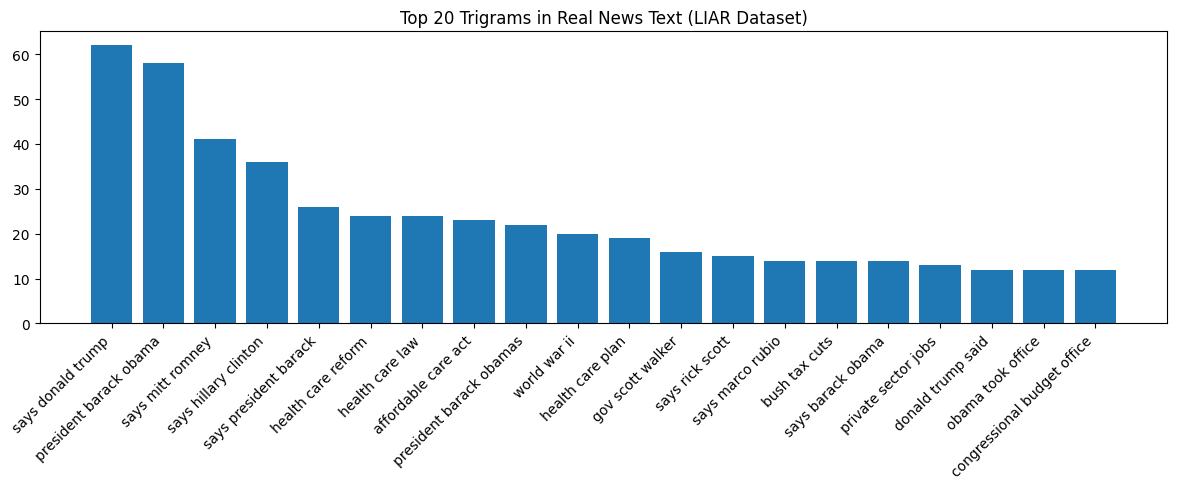

In [24]:
# Full code to extract and plot top 20 unigrams, bigrams, trigrams for fake and real news titles

# Function to extract top n-grams
def get_top_ngrams(corpus, ngram_range=(1, 1), n=20):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

# Function to plot bar charts
def plot_ngrams(ngrams, title):
    words = [x[0] for x in ngrams]
    counts = [x[1] for x in ngrams]
    plt.figure(figsize=(12, 5))
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Sample title data for fake and real news
fake_titles = df[df['label_binary'] == 0]['statement'].dropna()
real_titles = df[df['label_binary'] == 1]['statement'].dropna()

# Extract and plot for Fake News
plot_ngrams(get_top_ngrams(fake_titles, (1, 1), 20), "Top 20 Unigrams in Fake News Text (LIAR Dataset)")
plot_ngrams(get_top_ngrams(fake_titles, (2, 2), 20), "Top 20 Bigrams in Fake News Text (LIAR Dataset)")
plot_ngrams(get_top_ngrams(fake_titles, (3, 3), 20), "Top 20 Trigrams in Fake News Text (LIAR Dataset)")

# Extract and plot for Real News
plot_ngrams(get_top_ngrams(real_titles, (1, 1), 20), "Top 20 Unigrams in Real News Text (LIAR Dataset)")
plot_ngrams(get_top_ngrams(real_titles, (2, 2), 20), "Top 20 Bigrams in Real News Text (LIAR Dataset)")
plot_ngrams(get_top_ngrams(real_titles, (3, 3), 20), "Top 20 Trigrams in Real News Text (LIAR Dataset)")


/var/folders/32/6zl37k_j123fgy6v2_4hf4_40000gn/T/ipykernel_38008/2593247133.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


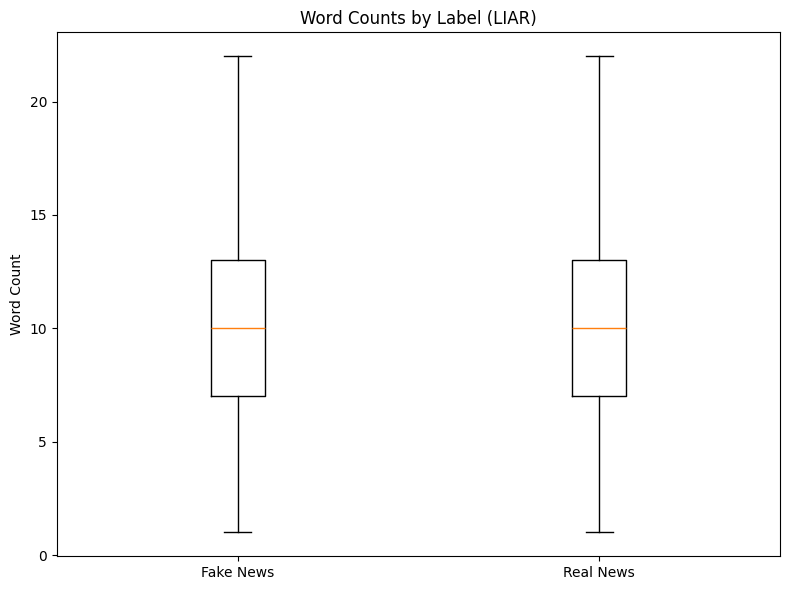

In [ ]:
# Add a new column for word count in the 'statement' column
df['word_count'] = df['statement'].fillna('').apply(lambda x: len(x.split()))

# Remove outliers using the IQR method for word_count
Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers based on the calculated bounds
df_no_outliers = df[(df['word_count'] >= lower_bound) & (df['word_count'] <= upper_bound)]

# Plot word counts by label using boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(
    [df_no_outliers[df_no_outliers['label_binary'] == 0]['word_count'],
     df_no_outliers[df_no_outliers['label_binary'] == 1]['word_count']],
    labels=['Fake News', 'Real News']
)
plt.title('Word Counts by Label (LIAR)')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()

In [26]:
# Split word counts by class
fake_counts = df[df['label_binary'] == 0]['word_count']
real_counts = df[df['label_binary'] == 1]['word_count']

def median_and_siqr(series):
    median = series.median()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    siqr = (q3 - q1) / 2  # semi-interquartile range
    return median, siqr

fake_median, fake_siqr = median_and_siqr(fake_counts)
real_median, real_siqr = median_and_siqr(real_counts)

print(f"Fake News - Median: {fake_median}, SIQR: {fake_siqr}")
print(f"Real News - Median: {real_median}, SIQR: {real_siqr}")


Fake News - Median: 10.0, SIQR: 3.0
Real News - Median: 10.0, SIQR: 3.0


/var/folders/32/6zl37k_j123fgy6v2_4hf4_40000gn/T/ipykernel_38008/1872048963.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fake_scores, real_scores], labels=['Fake News', 'Real News'])


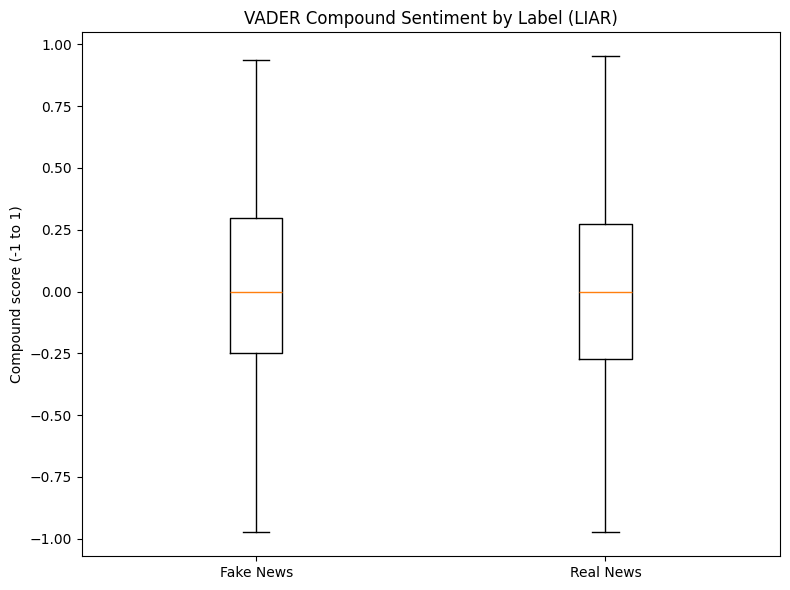

In [27]:
# Download VADER sentiment analysis model
nltk.download('vader_lexicon', quiet=True)

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Calculate VADER sentiment scores for the 'statement' column
scores = df['statement'].fillna('').apply(sia.polarity_scores) 
df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']] = (
        scores.apply(pd.Series)[['neg','neu','pos','compound']]
    )

# Prepare data by label
fake_scores = df.loc[df['label_binary'] == 0, 'vader_compound'].dropna()
real_scores = df.loc[df['label_binary'] == 1, 'vader_compound'].dropna()

# Plot VADER compound sentiment scores by label
plt.figure(figsize=(8, 6))
plt.boxplot([fake_scores, real_scores], labels=['Fake News', 'Real News'])
plt.title('VADER Compound Sentiment by Label (LIAR)')
plt.ylabel('Compound score (-1 to 1)')
plt.tight_layout()
plt.show()